<a href="https://colab.research.google.com/github/dh2chen/Numerical-First-Order-ODE-Solver-/blob/main/ODE_Integrator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Euler: [3.8954680821093515, 5.605262998900608, 7.568847715055677, 9.37056463895773, 10.705480053011026, 11.54647426612153, 12.023825480243058, 12.278961055892665, 12.410971951953904, 12.478132660846487, 12.51200762663419]
Quadratic: [6.330135633427696, 9.07304745839458, 11.09975229161354, 12.06889292550865, 12.409045268437985, 12.509424736161968, 12.536608757761895, 12.543674167470975, 12.545474593162131, 12.545928979114498, 12.546043111663533]
RK2: [7.315057915691866, 9.812696003121212, 11.466509079439827, 12.200950244791997, 12.448520813246938, 12.520178190293267, 12.539411187901267, 12.544389187546374, 12.545655156938675, 12.5459743465187, 12.54605448184224]


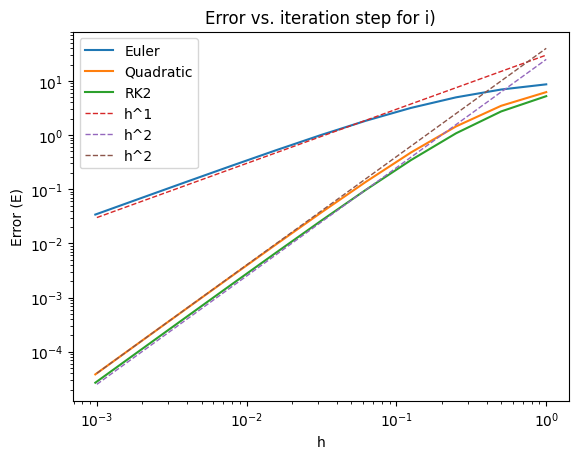

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

y_0 = np.exp(2/3)
p = (4*(1+6*np.sqrt(2)))/15
exact_sol = np.exp(p)

def f(x,y):
  return x**(3/2)*y

def df(x,y):
  return (3/2)*(x**(1/2))*y + (x**(3/2))*(x**(3/2)*y)

def eulers_method(n, func, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    y_j += func(x_j, y_j)*h
    #y_j = y_j + func(x_j, y_j)*h
    x_j += h

  return y_j


def quadratic_method(n, func, dfunc, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    #y_j += func(x_j, y_j)*h + dfunc(x_j, y_j)*((h**2)/2)
    y_j = y_j + func(x_j, y_j)*h + dfunc(x_j, y_j)*((h**2)/2)
    x_j += h

  return y_j

def RK2(n, func, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    k_1 = func(x_j, y_j)*h
    k_2 = h*func(x_j+(0.5*h), y_j+(0.5*k_1))
    y_j += k_2
    x_j += h

  return y_j


#sol = eulers_method(6, f, y_0, 1, 2)
#print(sol)

#sol2 = quadratic_method(6, f, df, y_0, 1, 2)
#print(sol2)

L_h = []

start = 1
end = 2

for i in range(11):
  N = 2**i
  L_h.append((end-start)/N)

L_euler = []
L_quadratic = []
L_RK2 = []

L_euler_error = []
L_quadratic_error = []
L_RK2_error = []

for i in range(11):
  euler_sol = abs(exact_sol - eulers_method(i, f, y_0, 1, 2))
  quad_sol = abs(exact_sol - quadratic_method(i, f, df, y_0, 1,2))
  rk2_sol = abs(exact_sol - RK2(i, f, y_0, 1, 2))

  euler_sol_2 = eulers_method(i, f, y_0, 1, 2)
  quad_sol_2 = quadratic_method(i, f, df, y_0, 1,2)
  rk2_sol_2 = RK2(i, f, y_0, 1, 2)


  L_euler_error.append(euler_sol)
  L_quadratic_error.append(quad_sol)
  L_RK2_error.append(rk2_sol)

  L_euler.append(euler_sol_2)
  L_quadratic.append(quad_sol_2)
  L_RK2.append(rk2_sol_2)



print("Euler:", L_euler)
print("Quadratic:" , L_quadratic)
print("RK2:", L_RK2)
# print(L_h)

x = np.linspace(0.001,1, 100)

fig, ax = plt.subplots()
ax.loglog(L_h, L_euler_error, label = 'Euler')
ax.loglog(L_h, L_quadratic_error, label = 'Quadratic')
ax.loglog(L_h, L_RK2_error, label = 'RK2')
ax.plot(x, 30*x, linestyle = 'dashed', linewidth = '1', label ='h^1')
ax.plot(x, 25*x**2, linestyle = 'dashed', linewidth = '1', label = 'h^2')
ax.plot(x, 40*x**2, linestyle = 'dashed', linewidth = '1', label = 'h^2')
ax.set_xlabel('h')
ax.set_ylabel('Error (E)')
ax.set_title('Error vs. iteration step for i)')
ax.legend()



Euler: [-0.5999999999999999, 1.8100915431563853, -9.398383717885308, -6.647050447605319, -5.480696266567873, -4.922045331262767, -4.678530505316653, -4.5767695240334305, -4.533225947890962, -4.513670422403824, -4.504501438368711]
Quadratic: [62.699999999999996, 76.8349797350725, 28.561539778455487, 6.993588005843778, -0.8127927240436059, -3.4603478836776405, -4.222591411945585, -4.425721547289067, -4.478036829446055, -4.491303314894694, -4.494643096499403]
RK2: [4.220183086312771, -25.4762070056746, 0.17743169518713592, -2.391692964319873, -3.73998372150872, -4.266400206800232, -4.432554318499229, -4.479175252971829, -4.491513303137083, -4.494686056460149, -4.495490451440057]


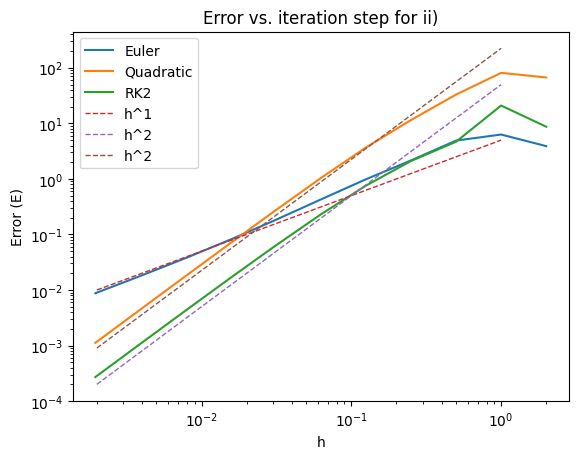

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

y_0 = 0.2
# p = (4*(1+6*np.sqrt(2)))/15
# exact_sol = np.exp(p)

exact_sol = (-0.1)*np.exp(4) + (0.8)*np.exp(-0.5)-(0.5*np.cos(16))
# exact_sol = 2*(np.exp(-0.5)) - (0.5*np.exp(-4)*np.cos(16)) - 1.3*np.exp(4)

# exact_sol =  -4.495760734345696

def f(x,y):
  return (2*y)-(1.8*np.exp(-x/4))+(4*np.sin(8*x))+np.cos(8*x)

def df(x,y):
  diff = (2*((2*y)-(1.8*np.exp(-x/4))+(4*np.sin(8*x))+np.cos(8*x)) + (1.8/4)*
         np.exp(-x/4) + 32*np.cos(8*x) - 8*np.sin(8*x))
  return diff

def eulers_method(n, func, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    y_j += func(x_j, y_j)*h
    #y_j = y_j + func(x_j, y_j)*h
    x_j += h

  return y_j


def quadratic_method(n, func, dfunc, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    #y_j += func(x_j, y_j)*h + dfunc(x_j, y_j)*((h**2)/2)
    y_j = y_j + func(x_j, y_j)*h + dfunc(x_j, y_j)*((h**2)/2)
    x_j += h

  return y_j


def RK2(n, func, initial_val, start, end):
  N = 2**n
  h = (end - start)/N
  x_j = start
  y_j = initial_val

  for i in range(N):
    k_1 = func(x_j, y_j)*h
    k_2 = h*func(x_j+(0.5*h), y_j+(0.5*k_1))
    y_j += k_2
    x_j += h

  return y_j


#sol = eulers_method(6, f, y_0, 1, 2)
#print(sol)

#sol2 = quadratic_method(6, f, df, y_0, 1, 2)
#print(sol2)

L_h = []

start = 0
end = 2

for i in range(11):
  N = 2**i
  L_h.append((end-start)/N)

L_euler = []
L_quadratic = []
L_RK2 = []

L_euler_error = []
L_quadratic_error = []
L_RK2_error = []

for i in range(11):
  euler_sol = abs(exact_sol - eulers_method(i, f, y_0, 0, 2))
  quad_sol = abs(exact_sol - quadratic_method(i, f, df, y_0, 0,2))
  rk2_sol =  abs(exact_sol - RK2(i, f, y_0, 0, 2))

  euler_sol_2 = eulers_method(i, f, y_0, 0, 2)
  quad_sol_2 = quadratic_method(i, f, df, y_0, 0,2)
  rk2_sol_2 = RK2(i, f, y_0, 0, 2)


  L_euler_error.append(euler_sol)
  L_quadratic_error.append(quad_sol)
  L_RK2_error.append(rk2_sol)

  L_euler.append(euler_sol_2)
  L_quadratic.append(quad_sol_2)
  L_RK2.append(rk2_sol_2)



print("Euler:", L_euler)
print("Quadratic:" , L_quadratic)
print("RK2:", L_RK2)
#print(exact_sol)
# print(L_h)

x = np.linspace(0.002,1, 100)

fig, ax = plt.subplots()
ax.loglog(L_h, L_euler_error, label = 'Euler')
ax.loglog(L_h, L_quadratic_error, label = 'Quadratic')
ax.loglog(L_h, L_RK2_error, label = 'RK2')
ax.plot(x, 5*x, linestyle = 'dashed', linewidth = '1', label ='h^1')
ax.plot(x, 50*x**2, linestyle = 'dashed', linewidth = '1', label = 'h^2')
ax.plot(x, 225*x**2, linestyle = 'dashed', linewidth = '1', label = 'h^2')
ax.set_xlabel('h')
ax.set_ylabel('Error (E)')
ax.set_title('Error vs. iteration step for ii)')
ax.legend()

